# Supernova lightcurve
超新星の光度曲線(lightcurve)を書いてみましょう。
\begin{align}
\frac{{\rm d}L}{{\rm d}t} &= \frac{t}{t_{\rm diff}^2}\left(\dot{Q}-L\right)\\
\end{align}

\begin{align}
\dot{Q} &= \left[
 6.45\times 10^{43}\exp\left(\frac{-t}{8.8\,{\rm day}}\right)
+1.45\times 10^{43}\exp\left(\frac{-t}{111.3\,{\rm day}}\right)
 \right]\left(\frac{M_{^{56}{\rm Ni}}}{M_{\rm sun}}\right)\, {\rm erg/s}
\end{align}

In [7]:
import matplotlib.pyplot as plt
from cycler import cycler
fnameforfig="sans-serif"
fsizeforfig=14
fsizeforlabel=16
plt.rcParams['font.family'] = fnameforfig
plt.rcParams['font.size'] = fsizeforfig
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
# red, blue, green, yellow, sky-blue azure, pink, orange, purple, brown
cmapudc =  cycler(color=["#ff2800","#0041ff" ,"#35a16B","#faf500","#66ccff", "#ff99a0","#ff9900" ,"#9a0079", "#663300"])
plt.rcParams['axes.prop_cycle'] = cmapudc
cmap = ["#ff2800","#0041ff" ,"#35a16B","#faf500","#66ccff", "#ff99a0","#ff9900" ,"#9a0079", "#663300"]


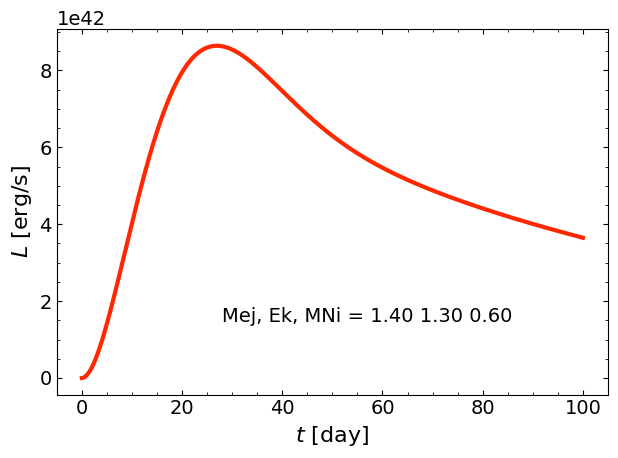

In [39]:
import math
import numpy as np

# constant
day_in_second = 8.64e4
Msun = 1.9891e33       # Solar mass in g
clight = 2.99792458e10 # speed of light in cm/s

###################################
# input parameters
# ejecta mass in Msun
Mej_inp = 1.4e0
# kinetic energy in 1e51 erg
Ek_inp  = 1.3e0
# 56Ni mass in Msun
MNi_inp = 0.6e0

# DATA I/O
filename = 'lightcurve.dat'
imagefile = 'lightcurve.png'
###################################

def main():
  global filename
  global imagefile
  Lightcurve(filename)
  PlotLC(filename,imagefile)

def Lightcurve(filename):
  pi = math.pi
  global Mej_inp, Ek_inp, MNi_inp

  # ejecta opacity in cm2/g
  kappa = 0.1e0

  Mej = Mej_inp*Msun  # g/cm^3
  Ek  = Ek_inp*1.0e51 # erg
  MNi = MNi_inp       # Msun

  v_ej = math.sqrt(2e0*Ek/Mej) # cm/s
  t_diff = math.sqrt(3e0*Mej*kappa/(4e0*pi*v_ej*clight)) # s
  #######################################################
  def Ldot(t,L):
    nonlocal MNi, t_diff
    tau_56Ni = 8.8e0    # 56Ni  decay time in days
    tau_56Co = 111.3e0 # 56Co decay time in days

    Qdot = (6.45e43*math.exp(-t/day_in_second/tau_56Ni)+1.45e43*math.exp(-t/day_in_second/tau_56Co))*MNi

    Ldot = t/t_diff**2e0*(Qdot-L)

    return Ldot
  #######################################################

  Lsn = 0e0 # luminosity [erg/s]
  t = 1e3   # s
  dt = 1e3  # s

  time = np.zeros(0)
  luminosity = np.zeros(0)
  while (t < 100e0*day_in_second): # light-curve calculation up to 100 days
    k1 = dt*Ldot(t,Lsn)
    k2 = dt*Ldot(t+dt/2e0,Lsn+k1/2e0)
    k3 = dt*Ldot(t+dt/2e0,Lsn+k2/2e0)
    k4 = dt*Ldot(t+dt,Lsn+k3)

    Lsn = Lsn + (k1+2e0*(k2+k3)+k4)/6e0

    t = t+dt
    time = np.append(time,t/day_in_second)
    luminosity = np.append(luminosity,Lsn)

  #######################################################
  with open(filename, 'w') as f:
    header = "# lightcurve with Mej=　{:.3f} Msun, Ek= {:.3f} x10^51erg, MNi= {:.3f} Msun".format(Mej/Msun, Ek/1.0e51, MNi)
    print(header,file=f)
    print('# time (day), luminosity (erg/s)',file=f)
    for n in range(len(time)):
      print(time[n],luminosity[n],file=f)
  #######################################################


def PlotLC(input,output):
  inputf= open(input, 'r')
  header= inputf.readline() # Read the fisrtline
  item= header.split()
  Mej_data = float(item[4])
  Ek_data  = float(item[7])
  MNi_data = float(item[10])
  header= inputf.readline() # Read the second line
  results = np.genfromtxt(input,skip_header=2,delimiter=' ') # Read numbers
  time, luminosity =  np.split(results,2,1)

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  im = ax.plot(time,luminosity,linewidth = 3.0)
  InputParameters = "Mej, Ek, MNi = {:.2f} {:.2f} {:.2f}".format(Mej_data, Ek_data, MNi_data)
  ax.text(0.3, 0.2, InputParameters, transform=ax.transAxes)
  ax.set_xlabel(r"$t~[{\rm day}]$", fontsize=fsizeforlabel)
  ax.set_ylabel(r"$L~[{\rm erg/s}]$", fontsize=fsizeforlabel)
  fig.tight_layout()
# Save the figure.
  fig.savefig(output)

main()


## パラメータを変えてみよう

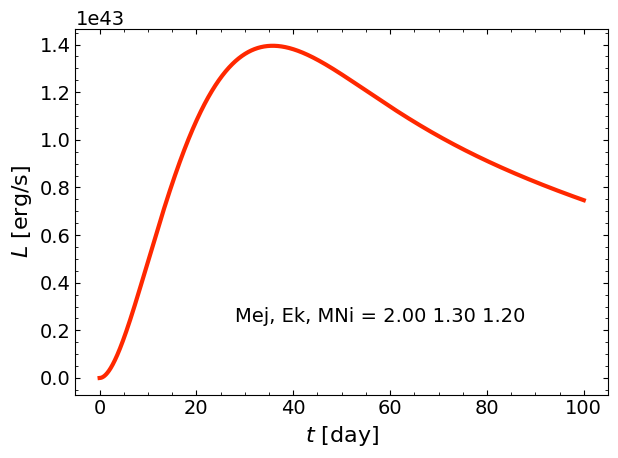

In [13]:
# parameter
Mej_inp = 2.0e0
# kinetic energy in 1e51 erg
Ek_inp  = 1.3e0
# 56Ni mass in Msun
MNi_inp = 1.2e0

# DATA I/O
filename = 'lightcurve.dat'
imagefile = 'lightcurve.png'

main()

# 系統的にパラメータを変えてみよう


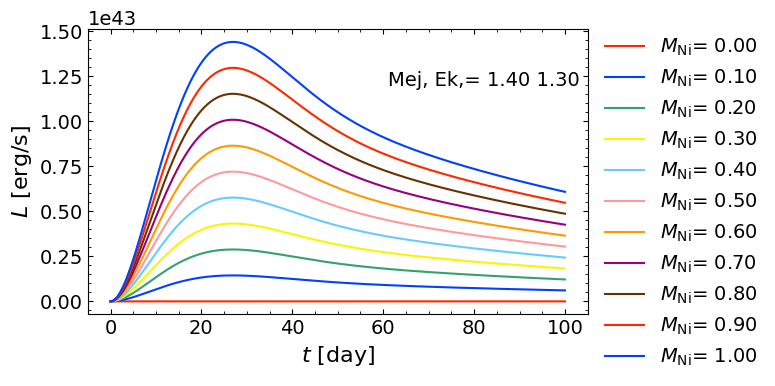

In [34]:
imax=10
def ManyLightcurves():
  global Mej_inp, Ek_inp, MNi_inp
  global imax
  for i in range(imax+1):
    # 56Ni mass in Msun
    MNi_inp = 1.0e0 *(float(i)/float(imax))
    Mej_inp = 1.4e0
    Ek_inp  = 1.3e0
    filename = 'lightcurve{:02}.dat'.format(i)
    Lightcurve(filename)

def PlotManyCurves():
  output = "manycurves.png"
  fig = plt.figure(figsize=(8,4))
  ax = fig.add_subplot(1,1,1)

  global imax
  for i in range(imax+1):
    filename = 'lightcurve{:02}.dat'.format(i)
    input = filename
    inputf= open(input, 'r')
    header= inputf.readline() # Read the fisrtline
    item= header.split()
    Mej_data = float(item[4])
    Ek_data  = float(item[7])
    MNi_data = float(item[10])
    header= inputf.readline() # Read the second line
    results = np.genfromtxt(input,skip_header=2,delimiter=' ') # Read numbers
    time, luminosity =  np.split(results,2,1)
    InputParameters = r"$M_{\rm Ni}$"+"= {:.2f}".format(MNi_data)
    im = ax.plot(time,luminosity,linewidth = 1.5, label=InputParameters)

  InputParameters = "Mej, Ek,= {:.2f} {:.2f}".format(Mej_data, Ek_data)
  ax.text(0.6, 0.8, InputParameters, transform=ax.transAxes)
  ax.set_xlabel(r"$t~[{\rm day}]$", fontsize=fsizeforlabel)
  ax.set_ylabel(r"$L~[{\rm erg/s}]$", fontsize=fsizeforlabel)
  ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,), borderaxespad=0, frameon=False)
  fig.tight_layout()
  # Save the figure.
  fig.savefig(output)

ManyLightcurves()
PlotManyCurves()
